In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def feed(inputs, weights):
    """
    Feed forward step
    """
    return weights.T @ inputs

def sigmoid(outputs):
    """
    Sigmoid activation
    """
    return 1/(np.exp(-outputs)+1)

def error(truth, prediction):
    """
    Log loss
    """
    return (sigmoid(prediction)-truth)*np.log(sigmoid(prediction))

def sigmoid_derivative(outputs):
    """
    Activation derivative with respect to outputs
    """
    return np.exp(outputs)/(np.exp(outputs)+1)**2

def error_gradient(inputs, truth, prediction):
    """
    Gradient of loss function with respect to model weights
    """
    derror_dsigmoid = (sigmoid(prediction)-truth) * sigmoid(prediction) / sigmoid(prediction)
    dsigmoid_doutput = sigmoid_derivative(prediction)
    derror_doutput = derror_dsigmoid*dsigmoid_doutput
    return np.tensordot(inputs,derror_doutput,0)

def sample_distribution(true_distribution):
    """
    Sample probability distribution used as reward signal for training data
    """
    return np.ceil(true_distribution-np.random.random_sample((len(true_distribution),)))

def adam(weights,inputs,targets,learning_rate,first_moment,second_moment,beta_1=0.9,beta_2=0.999):
    """
    Adam optimization algorithm
    """
    gradient = error_gradient(inputs,targets,feed(inputs,weights))
    moving_average_1 = beta_1*first_moment+(1-beta_1)*gradient
    moving_average_2 = beta_2*second_moment+(1-beta_2)*gradient**2
    return weights-learning_rate*first_moment/np.sqrt(second_moment+10**(-8)), moving_average_1, moving_average_2


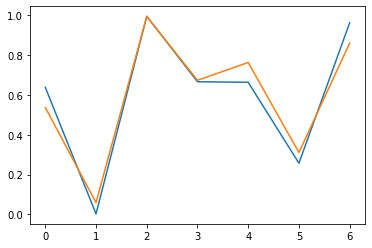

In [3]:
# single state (input = vector of ones)
input_values = 7
input = np.ones(input_values)

# single layer vanilla NN
output_values = 7
learning_rate = 0.01
weights = np.random.random_sample((output_values,input_values))
target_distribution = np.random.random_sample((output_values,))
first_moment = np.zeros((output_values,input_values))
second_moment = np.zeros((output_values,input_values))

# fitting target distribution in 50 epochs based on random samples (n-armed bandit)
for _ in range(50):
    target = sample_distribution(target_distribution)
    weights,first_moment,second_moment = adam(weights,input,target,learning_rate,first_moment,second_moment)

# target = orange; prediction = blue
results = np.array([sigmoid(feed(input,weights)),target_distribution]).T
plt.plot(results)

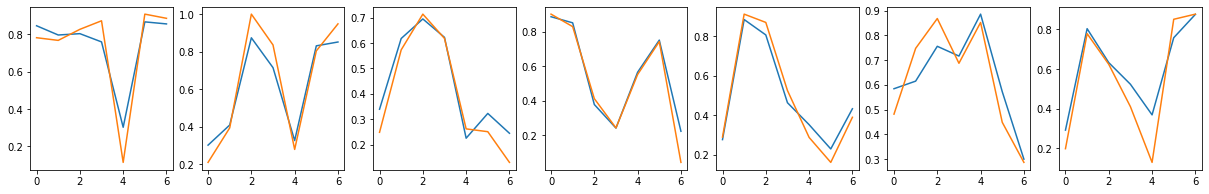

In [4]:
# 7 states (inputs = 7x7 identity matrix)
states = 7
input_values = 7
inputs = np.eye(states)

# single layer vanilla NN
output_values = 7
learning_rate = 0.01
weights = np.random.random_sample((output_values,input_values))
target_distribution = np.random.random_sample((output_values,states))
first_moment = np.zeros((output_values,input_values))
second_moment = np.zeros((output_values,input_values))

# fitting 7 target distributions in 50 epochs each based on random samples (contextual bandit)
for epoch in range(250):
    input = inputs[epoch%states]
    target = sample_distribution(target_distribution[epoch%states])
    weights,first_moment,second_moment = adam(weights,input,target,learning_rate,first_moment,second_moment)

# targets = orange; predictions = blue
results = [np.array([sigmoid(feed(inputs[state],weights)),target_distribution[state]]).T for state in range(states)]
fig, axs = plt.subplots(1, output_values, figsize=(3*output_values,3))
for index,ax in enumerate(axs):
    ax.plot(results[index])